<Figure size 1000x600 with 0 Axes>

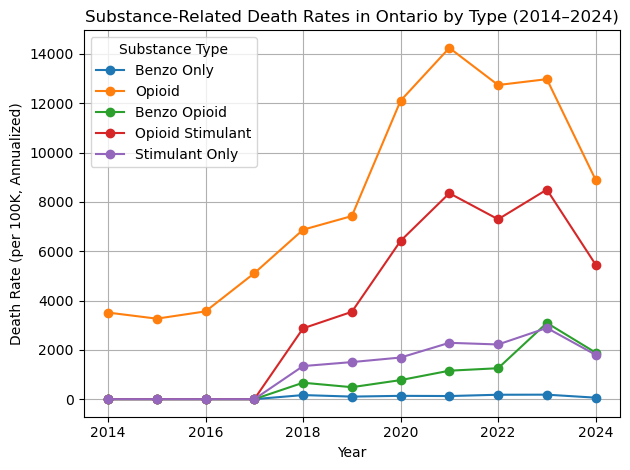

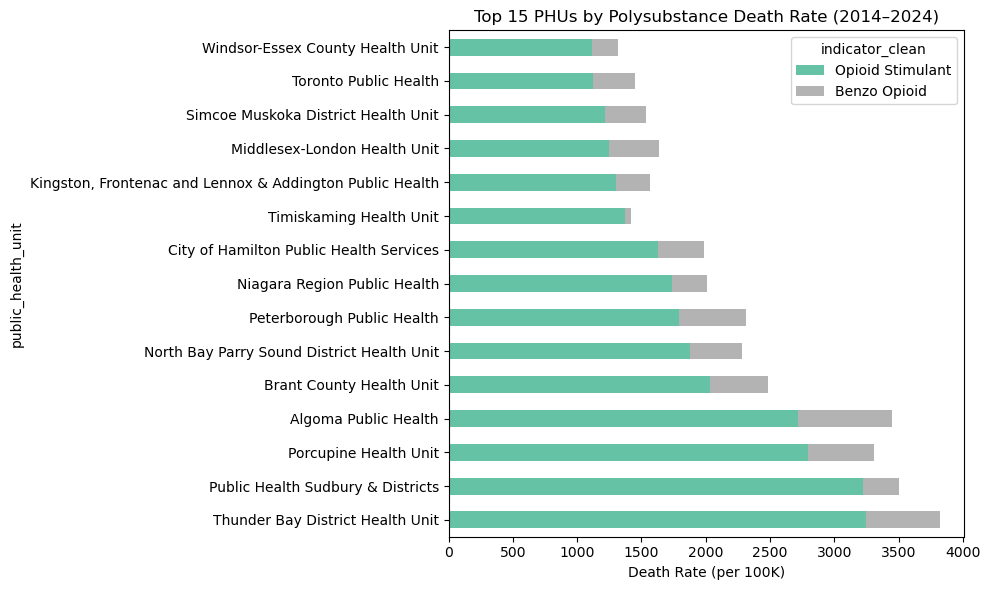

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("C://Users//shoaib//Desktop//Mental_health_ed_project//Cleaned_dataset//pho_ed_visits_phu_month_2014-2024.csv.csv")  # replace with your filename

# Normalize indicator field (lowercase + strip spaces)
df['indicator_clean'] = df['indicator'].str.lower().str.strip()

# Define substance death categories of interest
substance_indicators = {
    'opioid': 'deaths due to opioid toxicity',
    'opioid_stimulant': 'deaths due to opioid toxicity (with stimulant involvement)',
    'stimulant_only': 'deaths due to stimulant toxicity (without opioid involvement)',
    'benzo_opioid': 'deaths due to opioid toxicity (with benzodiazepine involvement)',
    'benzo_only': 'deaths due to benzodiazepine toxicity (without opioid involvement)'
}

# Filter to PHU-level only (exclude Ontario-wide aggregates)
df = df[df['public_health_unit'].str.lower() != 'ontario']

# Parse year from start date
df['year'] = pd.to_datetime(df['start_date_of_time_period'], errors='coerce').dt.year

# -----------------------------
# Trend Plot (Rate per 100K)
# -----------------------------
summary_rate = (
    df[df['indicator_clean'].isin(substance_indicators.values())]
    .groupby(['indicator_clean', 'year'])['cases_per_100_000_population_annualized']
    .sum()
    .reset_index()
)

# Pivot for plotting
pivot_rate = summary_rate.pivot(index='year', columns='indicator_clean', values='cases_per_100_000_population_annualized').fillna(0)

# Rename columns for clarity
pivot_rate = pivot_rate.rename(columns={v: k.replace("_", " ").title() for k, v in substance_indicators.items()})

# Plot trends over time
plt.figure(figsize=(10, 6))
pivot_rate.plot(marker='o')
plt.title("Substance-Related Death Rates in Ontario by Type (2014â€“2024)")
plt.ylabel("Death Rate (per 100K, Annualized)")
plt.xlabel("Year")
plt.grid(True)
plt.legend(title="Substance Type")
plt.tight_layout()
plt.show()

# -----------------------------
# PHU Breakdown (Top 15 PHUs by Polysubstance Deaths)
# -----------------------------
top_phus = (
    df[df['indicator_clean'].isin(substance_indicators.values())]
    .groupby(['public_health_unit', 'indicator_clean'])['cases_per_100_000_population_annualized']
    .sum()
    .reset_index()
)

# Pivot table
top_phus_pivot = top_phus.pivot(index='public_health_unit', columns='indicator_clean', values='cases_per_100_000_population_annualized').fillna(0)

# Rename for readability
top_phus_pivot = top_phus_pivot.rename(columns={v: k.replace("_", " ").title() for k, v in substance_indicators.items()})

# Filter top PHUs by Opioid Stimulant rates
top_subs = ['Opioid Stimulant', 'Benzo Opioid']
top_phus_sub = top_phus_pivot[top_subs].sort_values(by='Opioid Stimulant', ascending=False).head(15)

# Plot
top_phus_sub.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Top 15 PHUs by Polysubstance Death Rate (2014â€“2024)")
plt.xlabel("Death Rate (per 100K)")
plt.tight_layout()
plt.show()


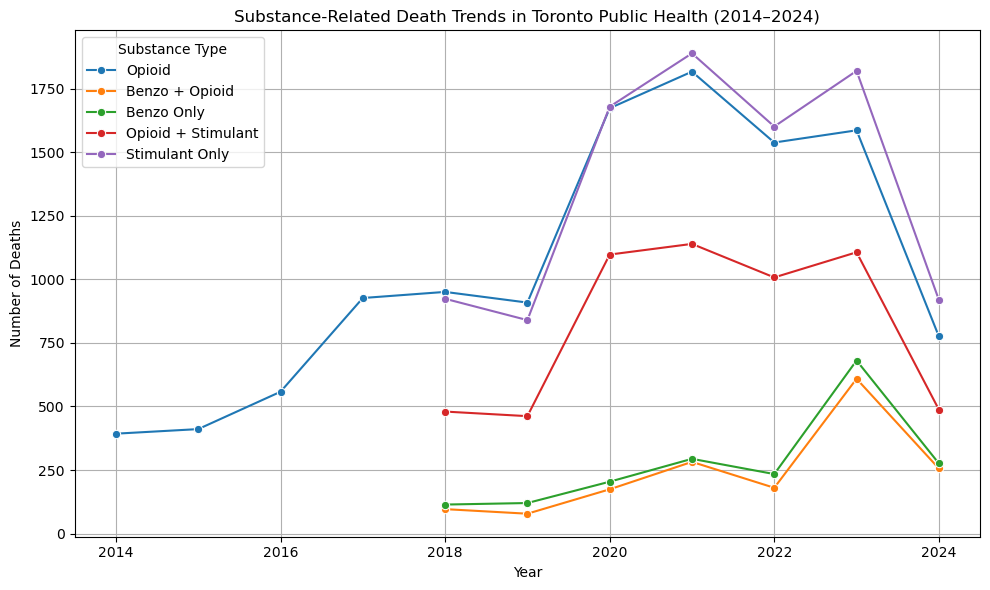

In [27]:
selected_phu = "Toronto Public Health"

# Filter data
df_phu = df[df["public_health_unit"].str.lower() == selected_phu.lower()].copy()

# Standardize indicator labels for grouping (adjust if needed)
indicator_mapping = {
    "Deaths due to opioid toxicity": "Opioid",
    "Deaths due to opioid toxicity (with stimulant involvement)": "Opioid + Stimulant",
    "Deaths due to opioid toxicity (with benzodiazepine involvement)": "Benzo + Opioid",
    "Deaths due to stimulant toxicity": "Stimulant Only",
    "Deaths due to stimulant toxicity (without opioid involvement)": "Stimulant Only",
    "Deaths due to benzodiazepine toxicity": "Benzo Only",
    "Deaths due to benzodiazepine toxicity (without opioid involvement)": "Benzo Only"
}
df_phu["indicator_clean"] = df_phu["indicator"].map(indicator_mapping)

# Convert time period to year
df_phu["year"] = pd.to_datetime(df_phu["start_date_of_time_period"]).dt.year

# Group and aggregate
df_summary = df_phu.groupby(["year", "indicator_clean"], as_index=False)["number_of_cases"].sum()

# -----------------------------
# ðŸ“Š Plotting
# -----------------------------
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_summary, x="year", y="number_of_cases", hue="indicator_clean", marker="o")
plt.title(f"Substance-Related Death Trends in {selected_phu} (2014â€“2024)")
plt.ylabel("Number of Deaths")
plt.xlabel("Year")
plt.legend(title="Substance Type")
plt.grid(True)
plt.tight_layout()
plt.show()

Error checking

In [5]:
import pandas as pd

# Load your dataset
file_path = "C://Users//shoaib//Desktop//Mental_health_ed_project//Cleaned_dataset//pho_ed_visits_phu_month_2014-2024.csv.csv" # Replace with your actual file path
df = pd.read_csv(file_path)

# Preview structure
print("Columns:", df.columns.tolist())
print("Sample data:")
print(df.head())

#  Check for missing values
print("\n Missing values per column:")
print(df.isnull().sum())

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#  Check unique years
if 'year' in df.columns:
    print("\n Unique years:", sorted(df['year'].unique()))
    print(" Year range: {} to {}".format(df['year'].min(), df['year'].max()))

# Unique substance types
if 'substance_type' in df.columns:
    print("\n Unique substance types:")
    print(df['substance_type'].dropna().unique())

# Unique PHUs
if 'public_health_unit' in df.columns:
    phu_counts = df['public_health_unit'].nunique()
    print(f"\nUnique PHUs: {phu_counts}")
    print("âœ… Sample PHUs:")
    print(df['public_health_unit'].dropna().unique()[:10])

#  Check for duplicates
duplicates = df.duplicated()
print(f"\n Duplicate rows: {duplicates.sum()}")

# ðŸ§¾ Check negative or zero death counts
if 'number_of_deaths' in df.columns:
    invalid_deaths = df[df['number_of_deaths'] <= 0]
    print(f"\n Entries with zero or negative deaths: {len(invalid_deaths)}")
    print(invalid_deaths.head())

# Aggregate totals (optional sanity check)
if {'year', 'number_of_deaths'}.issubset(df.columns):
    summary = df.groupby('year')['number_of_deaths'].sum()
    print("\nTotal deaths per year:")
    print(summary)

# check spelling issues in substance type
print("\nNormalized substance labels (sample):")
print(df['indicator'].str.lower().str.strip().value_counts().head())

# pivot to check structure
if {'year', 'indicator', 'number_of_deaths'}.issubset(df.columns):
    pivot_check = df.pivot_table(index='year', columns='substance_type', values='number_of_deaths', aggfunc='sum')
    print("\nPivot table (deaths by substance per year):")
    print(pivot_check.head())




Columns: ['public_health_unit', 'indicator', 'time_interval', 'time_period', 'start_date_of_time_period', 'end_date_of_time_period', 'number_of_cases', 'population', 'cases_per_100_000_population_annualized']
Sample data:
  public_health_unit                                   indicator  \
0            Ontario  ED visits due to opioid-related poisonings   
1            Ontario  ED visits due to opioid-related poisonings   
2            Ontario  ED visits due to opioid-related poisonings   
3            Ontario  ED visits due to opioid-related poisonings   
4            Ontario  ED visits due to opioid-related poisonings   

  time_interval time_period start_date_of_time_period end_date_of_time_period  \
0       Monthly   2014 - 01                  1/1/2014               1/31/2014   
1       Monthly   2014 - 02                  2/1/2014               2/28/2014   
2       Monthly   2014 - 03                  3/1/2014               3/31/2014   
3       Monthly   2014 - 04                  

In [23]:
df.dropna(how='all')


public_health_unit  \
0                                                Ontario   
1                                                Ontario   
2                                                Ontario   
3                                                Ontario   
4                                                Ontario   
...                                                  ...   
42626                          York Region Public Health   
42627                          York Region Public Health   
42628                          York Region Public Health   
42629                          York Region Public Health   
42630  Applied filters:\nNumber of cases is not blank...   

                                               indicator time_interval  \
0             ED visits due to opioid-related poisonings       Monthly   
1             ED visits due to opioid-related poisonings       Monthly   
2             ED visits due to opioid-related poisonings       Monthly   
3             ED visits due to opioid-related poisonings       Monthly   
4             ED visits due to opioid-related poisonings       Monthly   
...                                                  ...           ...   
42626  Deaths due to benzodiazepine toxicity (without...        Yearly   
42627  Deaths due to benzodiazepine toxicity (without...        Yearly   
42628  Deaths due to benzodiazepine toxicity (without...        Yearly   
42629  Deaths due to benzodiazepine toxicity (without...        Yearly   
42630                                                NaN           NaN   

      time_period start_date_of_time_period end_date_of_time_period  \
0       2014 - 01                  1/1/2014               1/31/2014   
1       2014 - 02                  2/1/2014               2/28/2014   
2       2014 - 03                  3/1/2014               3/31/2014   
3       2014 - 04                  4/1/2014               4/30/2014   
4       2014 - 05                  5/1/2014               5/31/2014   
...           ...                       ...                     ...   
42626        2020                  1/1/2020              12/31/2020   
42627        2021                  1/1/2021              12/31/2021   
42628        2022                  1/1/2022              12/31/2022   
42629        2023                  1/1/2023              12/31/2023   
42630         NaN                       NaN                     NaN   

       number_of_cases  population  cases_per_100_000_population_annualized  
0                247.0  13564168.0                                21.851690  
1                249.0  13573065.0                                22.014188  
2                270.0  13581963.0                                23.855167  
3                234.0  13590861.0                                20.660943  
4                272.0  13599758.0                                24.000427  
...                ...         ...                                      ...  
42626              2.0   1192038.0                                 0.167780  
42627              0.0   1205623.0                                 0.000000  
42628              2.0   1219986.0                                 0.163936  
42629              3.0   1239902.0                                 0.241955  
42630              NaN         NaN                                      NaN  

[42631 rows x 9 columns]

analysis 2


<Axes: title={'center': 'Population by Year (Ontario)'}, xlabel='year'>

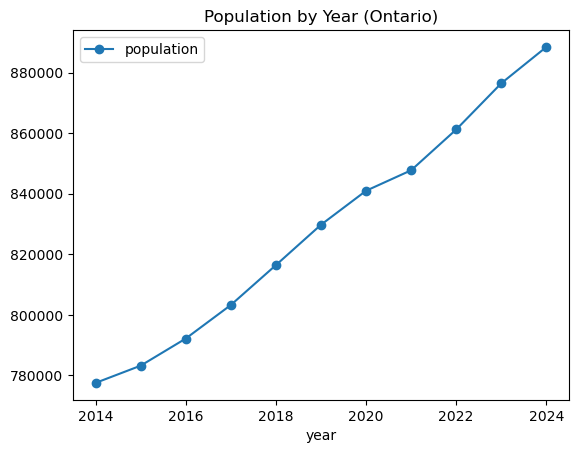

In [9]:
df_annual[['year', 'population']].plot(x='year', y='population', marker='o', title='Population by Year (Ontario)')
